<a href="https://colab.research.google.com/github/tayfundaldik/ML-Projects/blob/main/TayfunTF3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
%tensorflow_version 2.x
from tensorflow import keras
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [23]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [24]:
train_images.shape

(60000, 28, 28)

In [25]:
train_images[0,23,23]

194

In [26]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [27]:
class_names=[ 'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

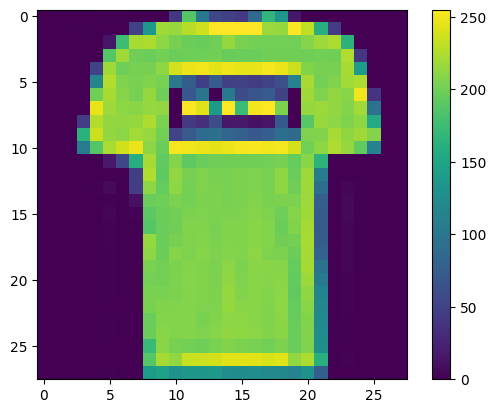

In [28]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [29]:
train_images= train_images /255.0
test_images = test_images /255.0

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [31]:
model.compile(optimizer ='adam',
              loss='sparse_categorical_crossentropy',
              metrics= ['accuracy'])

In [32]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4970 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3751 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3353 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3130 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2939 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2805 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2681 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2575 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2469 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.23

In [34]:
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=1)
print('Test Accuracy : ',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3713 - accuracy: 0.8719
Test Accuracy :  0.8719000220298767


313/313 [==============================] - 1s 2ms/step
Ankle Boot


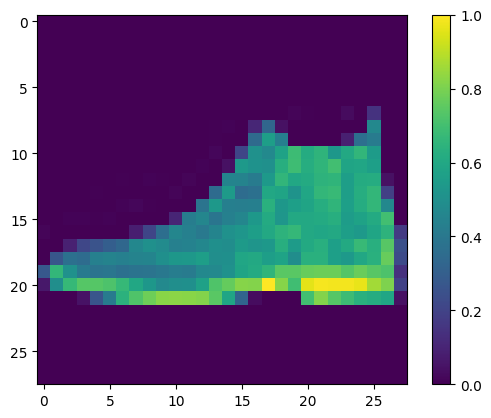

In [38]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number : 39
1/1 [==============================] - 0s 21ms/step


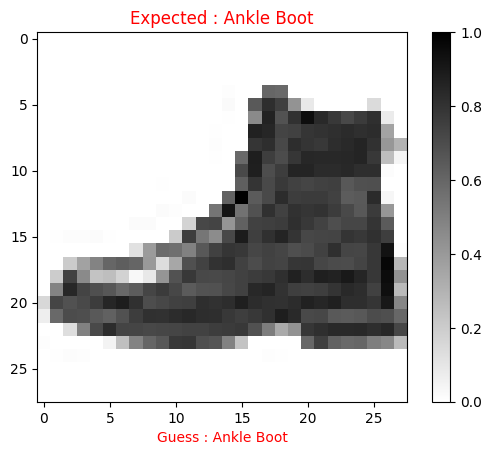

In [43]:
COLOR = 'red'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def show_img(img, label, guess):
  plt.figure()
  plt.imshow(img,cmap=plt.cm.binary)
  plt.title("Expected : "+ label)
  plt.xlabel("Guess : "+ guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def predict(model, image, correct_label):
  class_names=[ 'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
  prediction = model.predict(np.array([image]))
  predicted = class_names[np.argmax(prediction)]

  show_img(image, class_names[correct_label], predicted)


def get_number():
  while True:
    num = input("Pick a number : ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 100:
        return int(num)
      else:
        print("Please try again.")
num = get_number()
image= test_images[num]
label = test_labels[num]
predict(model,image,label)